# Data information



The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


## Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.





# Motivation

In the U.S. approximately 9% of total retail sales comes from an e-commerce website. In fact, companies like Amazon have created retail empires off being such a huge e-commerce website. With e-commerce becoming more and more prevalent in today’s economy it is important for businesses within this sector to understand what factors into a site visitor making a purchase, and being able to put their attention on potential customers. We thought it would be interesting to look into if it’s possible to predict the buying behavior of a site visitor as this can have many implications such as E-commerce website able to better target ads or figure out factors that may lead to increased sales.

## Data Characteristics and Initial Exploration
The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository. The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. The variables in the data set can be split into these three categories: data related to the page that the user lands on, Google Analytics metrics, and user visit data. 

Upon initially exploring the data, the first thing I noticed was the imbalance in the labels. In this data set 85% of the site visitors did not end up making a purchase, the assumption was that majority of people window shop and did usually do not want to commit to a purchase.

# Settings

In [4]:
# first we need to import our numerical package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import datetime
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

C:\Users\paria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [5]:
## Read the .xlsx file with the pandas read_csv method
df = pd.read_csv('online_shoppers_intention.csv')
df.drop_duplicates(inplace=True)

In [6]:
df = df.rename(str.lower, axis='columns')

In [7]:
df.shape

(12205, 18)

In [8]:
list(df)

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'month',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'visitortype',
 'weekend',
 'revenue']

In [9]:
l_target = ['revenue']
l_num = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'operatingsystems',
 'browser',
 'region',
 'traffictype']
l_bool = ['weekend']
l_cat = ['month', 'visitortype']

In [10]:
df = pd.get_dummies(df, columns = l_cat)

In [11]:
## Read the .xlsx file with the pandas read_csv method
df = pd.read_csv('online_shoppers_intention.csv')
df.drop_duplicates(inplace=True)

In [12]:
df = df.rename(str.lower, axis='columns')

In [13]:
df.shape

(12205, 18)

In [14]:
list(df)

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'month',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'visitortype',
 'weekend',
 'revenue']

In [15]:
l_target = ['revenue']
l_num = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'operatingsystems',
 'browser',
 'region',
 'traffictype']
l_bool = ['weekend']
l_cat = ['month', 'visitortype']

In [16]:
df = pd.get_dummies(df, columns = l_cat)

In [17]:
df.shape

(12205, 29)

In [18]:
df

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,month_Jul,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,visitortype_New_Visitor,visitortype_Other,visitortype_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


# Data

In [19]:
df.revenue.value_counts()/len(df)

False    0.843671
True     0.156329
Name: revenue, dtype: float64

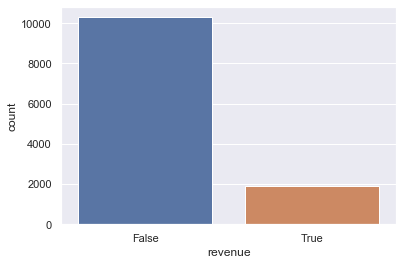

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="revenue", data=df)

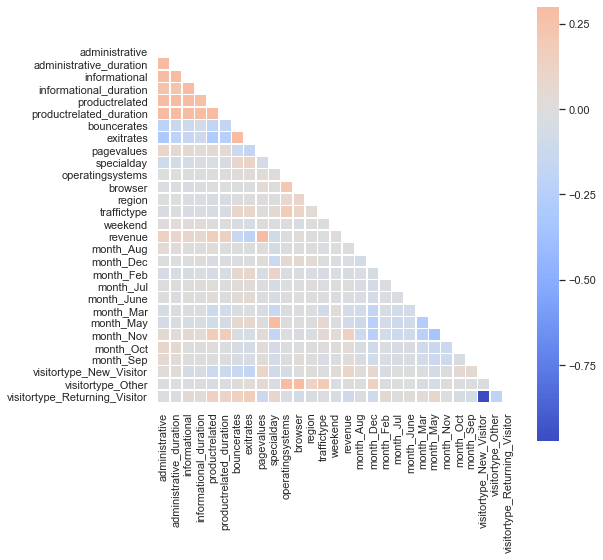

In [21]:
from matplotlib import pyplot
corr= df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = fig, ax = pyplot.subplots(figsize=(8,8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5,cmap='coolwarm',center=0, )
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=20)



In [22]:
list(df)

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'weekend',
 'revenue',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jul',
 'month_June',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'visitortype_New_Visitor',
 'visitortype_Other',
 'visitortype_Returning_Visitor']

In [23]:
import pandas as pd
X = df.drop(columns = ['revenue'])
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# Hyperopt

In [24]:
# def run_model(X_train, y_train, model = 'xgb_clf', cross_val = True, cv = 10):
#     from sklearn.model_selection import cross_val_score

#     # warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    
#     if model == 'xgb_clf':
#         classifier = xgb.XGBClassifier( n_estimators = space['n_estimators'],
#                                         max_depth = space['max_depth'],
#                                         learning_rate = space['learning_rate'],
#                                         gamma = space['gamma'],
#                                         min_child_weight = space['min_child_weight'],
#                                         subsample = space['subsample'],
#                                         colsample_bytree = space['colsample_bytree']
#                                         )
    
#         classifier.fit(X_train, y_train.values.ravel())
#         if cross_val:
#         # Applying k-Fold Cross Validation
#         # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#             score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = cv)
#             CrossValMean = score.mean()


#         return{'loss':1-CrossValMean, 'status': STATUS_OK }
        

        

        
        
#     elif model == 'rf':
#         pass
    
#     if cross_val:
#         # Applying k-Fold Cross Validation
#         # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# #         score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = cv)
# #         CrossValMean = score.mean()
#         pass

#     return{'loss':1-CrossValMean, 'status': STATUS_OK }


# Models

In [29]:
! pip install xgboost


In [58]:
from sklearn.linear_model import LogisticRegression
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [59]:
X_ = X_train
y = y_train

In [60]:
models = {
   'logistic_regression' : LogisticRegression
  , 'rf' : RandomForestClassifier
    ,'xgb': XGBClassifier
#    ,'knn' : KNeighborsClassifier
#     ,'svc' : SV
}

In [61]:
def search_space(model):
 
    model = model.lower() 
    space = {}
 
 
 
    if model == 'logistic_regression':
         space = {
             'warm_start' : hp.choice('warm_start', [True, False]),
             'fit_intercept' : hp.choice('fit_intercept', [True, False]),
             'tol' : hp.uniform('tol', 0.00001, 0.0001),
             'C' : hp.uniform('C', 0.05, 3), 
 #            'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
         #    'max_iter' : hp.choice('max_iter', range(1000,10000)),
#              'scale': hp.choice('scale', [0, 1]),
#              'normalize': hp.choice('normalize', [0, 1]),
 #            'multi_class' : hp.choice('multi_class', ['auto']), 
  #           'class_weight' : hp.choice('class_weight', ['balanced'])
      }
 
    elif model == 'rf':
        space = {  'max_depth': hp.choice('max_depth', range(1,20)), 
                   'max_features': hp.choice('max_features', range(1,3)),
                   'n_estimators': hp.choice('n_estimators', range(10,50)),
                   'criterion': hp.choice('criterion', ["gini", "entropy"]),
                   'class_weight': 'balanced'  
     }
        
    elif model == 'xgb':
        space ={
    'max_depth' :           hp.choice('max_depth'                , range(5, 30, 1)),
    'learning_rate' :       hp.quniform('learning_rate'          , 0.01, 0.5, 0.01),
    'n_estimators' :        hp.choice('n_estimators'             , range(50, 101, 50)),
    'gamma' :               hp.quniform('gamma'                  , 0, 0.50, 0.01),
    'min_child_weight' :    hp.quniform('min_child_weight'       , 1, 10, 1),
    'subsample' :           hp.quniform('subsample'              , 0.1, 1, 0.01),
    'colsample_bytree' :    hp.quniform('colsample_bytree'       , 0.1, 1.0, 0.01)
}
 
    space['model'] = model
 
    return space

In [62]:
def get_acc_status(clf):
    acc = cross_val_score(clf, X_, y, cv=5).mean()
    return {'loss': -acc, 'status': STATUS_OK}

In [63]:
def obj_fnc(params) : 
    model = params.get('model').lower()
    # X_ = scale_normalize(params,X[:]) 
    del params['model']
    clf = models[model](**params)
    return(get_acc_status(clf))

## logistic regression

In [64]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [65]:
model = 'logistic_regression'

In [66]:
search_space(model)

{'warm_start': <hyperopt.pyll.base.Apply at 0x24b70497b38>,
 'fit_intercept': <hyperopt.pyll.base.Apply at 0x24b70497cc0>,
 'tol': <hyperopt.pyll.base.Apply at 0x24b70497e80>,
 'C': <hyperopt.pyll.base.Apply at 0x24b70497fd0>,
 'model': 'logistic_regression'}

In [67]:

# run block of code and catch warnings
with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")
	# execute code that will generate warnings

In [68]:
hypopt_trials = Trials()
 
best_params = fmin(obj_fnc, search_space(model), algo=tpe.suggest, max_evals=50, trials= hypopt_trials)
 
print(best_params)
print(hypopt_trials.best_trial['result']['loss'])

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

  2%|▏         | 1/50 [00:00<00:25,  1.93trial/s, best loss: -0.88140072440046]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

  4%|▍         | 2/50 [00:01<00:24,  1.93trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

  6%|▌         | 3/50 [00:01<00:24,  1.92trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

  8%|▊         | 4/50 [00:02<00:24,  1.91trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 10%|█         | 5/50 [00:02<00:23,  1.95trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 12%|█▏        | 6/50 [00:03<00:21,  2.01trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 14%|█▍        | 7/50 [00:03<00:20,  2.05trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 16%|█▌        | 8/50 [00:03<00:20,  2.06trial/s, best loss: -0.8822201342197376]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 18%|█▊        | 9/50 [00:04<00:19,  2.09trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 20%|██        | 10/50 [00:04<00:19,  2.10trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 22%|██▏       | 11/50 [00:05<00:18,  2.09trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 24%|██▍       | 12/50 [00:05<00:18,  2.11trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 26%|██▌       | 13/50 [00:06<00:17,  2.14trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 28%|██▊       | 14/50 [00:06<00:16,  2.14trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 30%|███       | 15/50 [00:07<00:16,  2.13trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 32%|███▏      | 16/50 [00:07<00:16,  2.11trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 34%|███▍      | 17/50 [00:08<00:16,  1.99trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 36%|███▌      | 18/50 [00:08<00:16,  1.88trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 38%|███▊      | 19/50 [00:09<00:16,  1.88trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 40%|████      | 20/50 [00:10<00:16,  1.80trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 42%|████▏     | 21/50 [00:10<00:16,  1.81trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 44%|████▍     | 22/50 [00:11<00:15,  1.85trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 46%|████▌     | 23/50 [00:11<00:14,  1.87trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 48%|████▊     | 24/50 [00:12<00:13,  1.89trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 50%|█████     | 25/50 [00:12<00:13,  1.91trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 52%|█████▏    | 26/50 [00:13<00:12,  1.90trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 54%|█████▍    | 27/50 [00:13<00:11,  1.94trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 56%|█████▌    | 28/50 [00:14<00:11,  1.98trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 58%|█████▊    | 29/50 [00:14<00:10,  2.01trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 60%|██████    | 30/50 [00:15<00:10,  1.99trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 62%|██████▏   | 31/50 [00:15<00:09,  2.00trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 64%|██████▍   | 32/50 [00:16<00:08,  2.01trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 66%|██████▌   | 33/50 [00:16<00:08,  2.05trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 68%|██████▊   | 34/50 [00:17<00:07,  2.04trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 70%|███████   | 35/50 [00:17<00:07,  1.96trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 72%|███████▏  | 36/50 [00:18<00:07,  1.88trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 74%|███████▍  | 37/50 [00:18<00:06,  1.93trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 76%|███████▌  | 38/50 [00:19<00:06,  1.93trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 78%|███████▊  | 39/50 [00:19<00:05,  1.98trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 80%|████████  | 40/50 [00:20<00:05,  1.98trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 82%|████████▏ | 41/50 [00:20<00:04,  2.01trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 84%|████████▍ | 42/50 [00:21<00:03,  2.05trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 86%|████████▌ | 43/50 [00:21<00:03,  2.08trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 88%|████████▊ | 44/50 [00:22<00:02,  2.04trial/s, best loss: -0.8825275112689178]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 90%|█████████ | 45/50 [00:22<00:02,  1.97trial/s, best loss: -0.8835513669596164]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 92%|█████████▏| 46/50 [00:23<00:02,  1.97trial/s, best loss: -0.8835513669596164]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 94%|█████████▍| 47/50 [00:23<00:01,  1.94trial/s, best loss: -0.8835513669596164]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 96%|█████████▌| 48/50 [00:24<00:01,  1.99trial/s, best loss: -0.8835513669596164]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

 98%|█████████▊| 49/50 [00:24<00:00,  2.02trial/s, best loss: -0.8835513669596164]

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

100%|██████████| 50/50 [00:25<00:00,  2.05trial/s, best loss: -0.8835513669596164]
{'C': 1.377342950666058, 'fit_intercept': 1, 'tol': 3.166952301894658e-05, 'warm_start': 1}
-0.8835513669596164


In [69]:
best_params

{'C': 1.377342950666058,
 'fit_intercept': 1,
 'tol': 3.166952301894658e-05,
 'warm_start': 1}

In [70]:
best_space = search_space(model)
# print(best_space)
l_best = list(best_space.keys())
best_space = {}
# print(l_best)
for i in l_best:
    if i != 'model':
        best_space[i] = best_params[i]  
best_space

{'warm_start': 1,
 'fit_intercept': 1,
 'tol': 3.166952301894658e-05,
 'C': 1.377342950666058}

In [75]:
clf = LogisticRegression(warm_start= best_space['warm_start']
                         ,fit_intercept = best_space['fit_intercept']
                          , tol = best_space[ 'tol']
                        
                          , C = best_space[ 'C']
                        
                       #   , solver = best_space[ 'solver']
                        
                         # , max_iter = best_space[ 'max_iter']
                        
                        #  ,multi_class = best_space['multi_class']
                        
                          , class_weight = 'balanced'
                        
                        
                        
                        
                        
                        
                        )
clf.fit(X_train, y_train.values.ravel())
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_test

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([ True, False, False, ..., False, False, False])

In [76]:
((y_pred_train == y_train.values.ravel()).sum())/len(y_pred_train)

0.8545678000819337

In [77]:
((y_pred_test == y_test.values.ravel()).sum())/len(y_pred_test)

0.8525194592380172

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test ))
# df_c = pd.DataFrame(report).transpose()
# df_c

              precision    recall  f1-score   support

       False       0.96      0.86      0.91      2055
        True       0.52      0.79      0.63       386

    accuracy                           0.85      2441
   macro avg       0.74      0.83      0.77      2441
weighted avg       0.89      0.85      0.86      2441



## RF

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = 'rf'

In [83]:
hypopt_trials = Trials()
 
best_params = fmin(obj_fnc, search_space(model), algo=tpe.suggest, max_evals=100, trials= hypopt_trials)
 
print(best_params)
print(hypopt_trials.best_trial['result']['loss'])

100%|██████████| 100/100 [01:00<00:00,  1.94trial/s, best loss: -0.8949209077249796]
{'criterion': 0, 'max_depth': 17, 'max_features': 1, 'n_estimators': 38}
-0.8949209077249796


In [84]:
best_params

{'criterion': 0, 'max_depth': 17, 'max_features': 1, 'n_estimators': 38}

In [85]:
clf = RandomForestClassifier(
    #criterion= best_params['criterion']
                         max_depth =best_params['max_depth']
                          , max_features = best_params[ 'max_features']
        ,n_estimators = best_params[ 'n_estimators']
                        

                        
                        
                        
                        
                        
                        
                        )
clf.fit(X_train, y_train.values.ravel())
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_test

array([ True, False, False, ..., False, False, False])

In [86]:
((y_pred_train == y_train.values.ravel()).sum())/len(y_pred_train)

0.9715280622695617

In [87]:
((y_pred_test == y_test.values.ravel()).sum())/len(y_pred_test)

0.88529291274068

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test ))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94      2055
        True       0.84      0.34      0.48       386

    accuracy                           0.89      2441
   macro avg       0.87      0.66      0.71      2441
weighted avg       0.88      0.89      0.86      2441



## XGBoost

In [89]:
model = 'xgb'

In [90]:
hypopt_trials = Trials()
 
best_params = fmin(obj_fnc, search_space(model), algo=tpe.suggest, max_evals=100, trials= hypopt_trials)
 
print(best_params)
print(hypopt_trials.best_trial['result']['loss'])

100%|██████████| 100/100 [02:48<00:00,  2.11s/trial, best loss: -0.9039331566400577]
{'colsample_bytree': 0.9400000000000001, 'gamma': 0.46, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 0, 'subsample': 0.72}
-0.9039331566400577


In [91]:
best_params

{'colsample_bytree': 0.9400000000000001,
 'gamma': 0.46,
 'learning_rate': 0.01,
 'max_depth': 2,
 'min_child_weight': 2.0,
 'n_estimators': 0,
 'subsample': 0.72}

In [92]:
clf = XGBClassifier(
    #criterion= best_params['criterion']
                         colsample_bytree =best_params['colsample_bytree']
                          , gamma = best_params[ 'gamma']
        ,max_depth = best_params[ 'max_depth']
                                                          ,min_child_weight = best_params[ 'min_child_weight']
                                                ,n_estimators = best_params[ 'n_estimators'] 
                                                        ,subsample = best_params[ 'subsample']

                        
                        
                        
                        
                        
                        
                        )
clf.fit(X_train, y_train.values.ravel())
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_test

array([False, False, False, ..., False, False, False])

In [93]:
((y_pred_train == y_train.values.ravel()).sum())/len(y_pred_train)

0.8441212617779599

In [94]:
((y_pred_test == y_test.values.ravel()).sum())/len(y_pred_test)

0.8418680868496518

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test ))

C:\Users\paria\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.84      1.00      0.91      2055
        True       0.00      0.00      0.00       386

    accuracy                           0.84      2441
   macro avg       0.42      0.50      0.46      2441
weighted avg       0.71      0.84      0.77      2441



Imbalance dataset

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.unique(y, return_counts = True)

In [ ]:
%%time
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_sample(X, y)

In [ ]:
np.unique(y_res, return_counts = True)

In [ ]:
df_boston['RAD'].value_counts(normalize=True,sort=False)

Once run the model without balancing the data and see the result and one time balancing the data using SMOTE and see the results. The accuracy should decrease now when we use Smote because now accuracy should be a fair metric to look at.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_boston.drop(columns = 'is_above_40k'), 
                                                    df_boston['is_above_40k'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

for classification models accuracy is just a percentage of the data that you predicted correctly.

Here, we fit (train) the model (logistic regression), for training we need x_train and y_train

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

Once the model is trained, pass it the testing data to see if we get predictions back. To do so, we invoke the .predict(x_test) method. We can also invoke the .predict_proba(x_test) method if we wish to get the raw probabilites instead of the final predictions.We don't need to pass the labels, because in order to predict, We don't need to know what labels are. 

In [ ]:
y_test_pred=lr.predict(x_test)

Get the accuracy of the model by loading from sklearn.metrics import accuracy_score and calling the accuracy_score function.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

 I did my training. I did my prediction and now I am doing my evaluation, meaning that I am going to see how close the predictions come to the ground truth.

Is accuracy a good metric for evaluating this model? Why or why not? So if we had a machine learning model that predicted that all of the shoppers won't buy No matter what you know about any other piece of information in the data sets, I'm just going to predict that all of shoppers won't buy, I should be correct about 84% of the time . What the model did is it took a look at all of the other information that we know about the shoppers, all the information that is in the data here.it was able to improve on that baseline accuracy. If you want to think of the 84% as a baseline accuracy on false prediction. It was able to improve on that baseline accuracy by about -----. Is that a lot or not a lot. It's hard to say.The important thing here is that accuracy may not be the best predictor or the best metric to evaluate a classification model when your data is imbalanced.So what should we look at? The most direct metric to look at, is the confusion matrix.

First thing that we can look it up at any kind of classification model is we can look at a confusion matrix.confusion matrix says on the rows I'm going to show you the true labels. Right. So at the top are shoppers that did/did not purchase and the bottom are shoppers that didn't/did purchase and then on the columns, I'm going to show you the predictions. So the first column is shoppers that we predicted to purchase. And then the second column are shoppers that we predicted to not purchase .And so when you look at the diagonal terms in the classification in the confusion matrix, those are predictions that match the true value.And the off diagonal ones are predictions that don't match.Confusion matrix is very useful and intuitive because we can see different types of errors..

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

From the confusion matrix, we can derive accuracy, precision, recall, and the F1-score, which is a sort of average of precision and recall.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

when you have unbalanced data, people are going to turn to precision and recall when they evaluate the the models performance, much more than then accuracy because accuracy is going to give you a optimistic performance.

One way to visually evaluate a binary classification model is using the ROC plot. By itself, it is not very useful, but by comparing the ROC plot of multiple models we can start seeing which models are better. The area under the ROC plot is called AUC (area under the curve) and the closer it is to 1, the better the model.

The ROC is much more helpful when you're comparing multiple models to see which one of them is more accurate because if one model has a curve that is kind of close to the 45 degree line and another model has a curve that is just above the the first model across the entire plot.Then that's a model that does better across the board. From the ROC plot, We can also grab another metric called AUC which stands for area under the curve. The area of everything that is under the blue line is what we call the AUC . The higher is the AUC, the better is your model. 

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In this section, we train the same logistic regression classifier, but use cross-validation to tune it.I need to set the random state.So that doesn't change the model itself and then max-iter is just something about the number of steps that you want to let this run before the model either converge or give up.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clr = LogisticRegressionCV(cv = 5, random_state = 0, max_iter = 1000)
clr.fit(x_train, y_train)

In [ ]:
predictions = clr.predict(x_test)

In [ ]:
np.unique(predictions, return_counts = True)

In [ ]:
accuracy_score(predictions, y_test)

In [ ]:
metrics.confusion_matrix(y_test, predictions)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In class imbalance problemslooking at accuracy (percent misclassification) can be optimistic instead we look at other metrics like precision, recall, or AUC. Class imbalance usually implies that not all errors ( misclassification) should have the same importance.